In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['figure.dpi']=700

In [4]:
df=pd.read_csv('/content/Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [6]:
df['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [7]:
df.shape

(101, 18)

In [8]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

<Axes: >

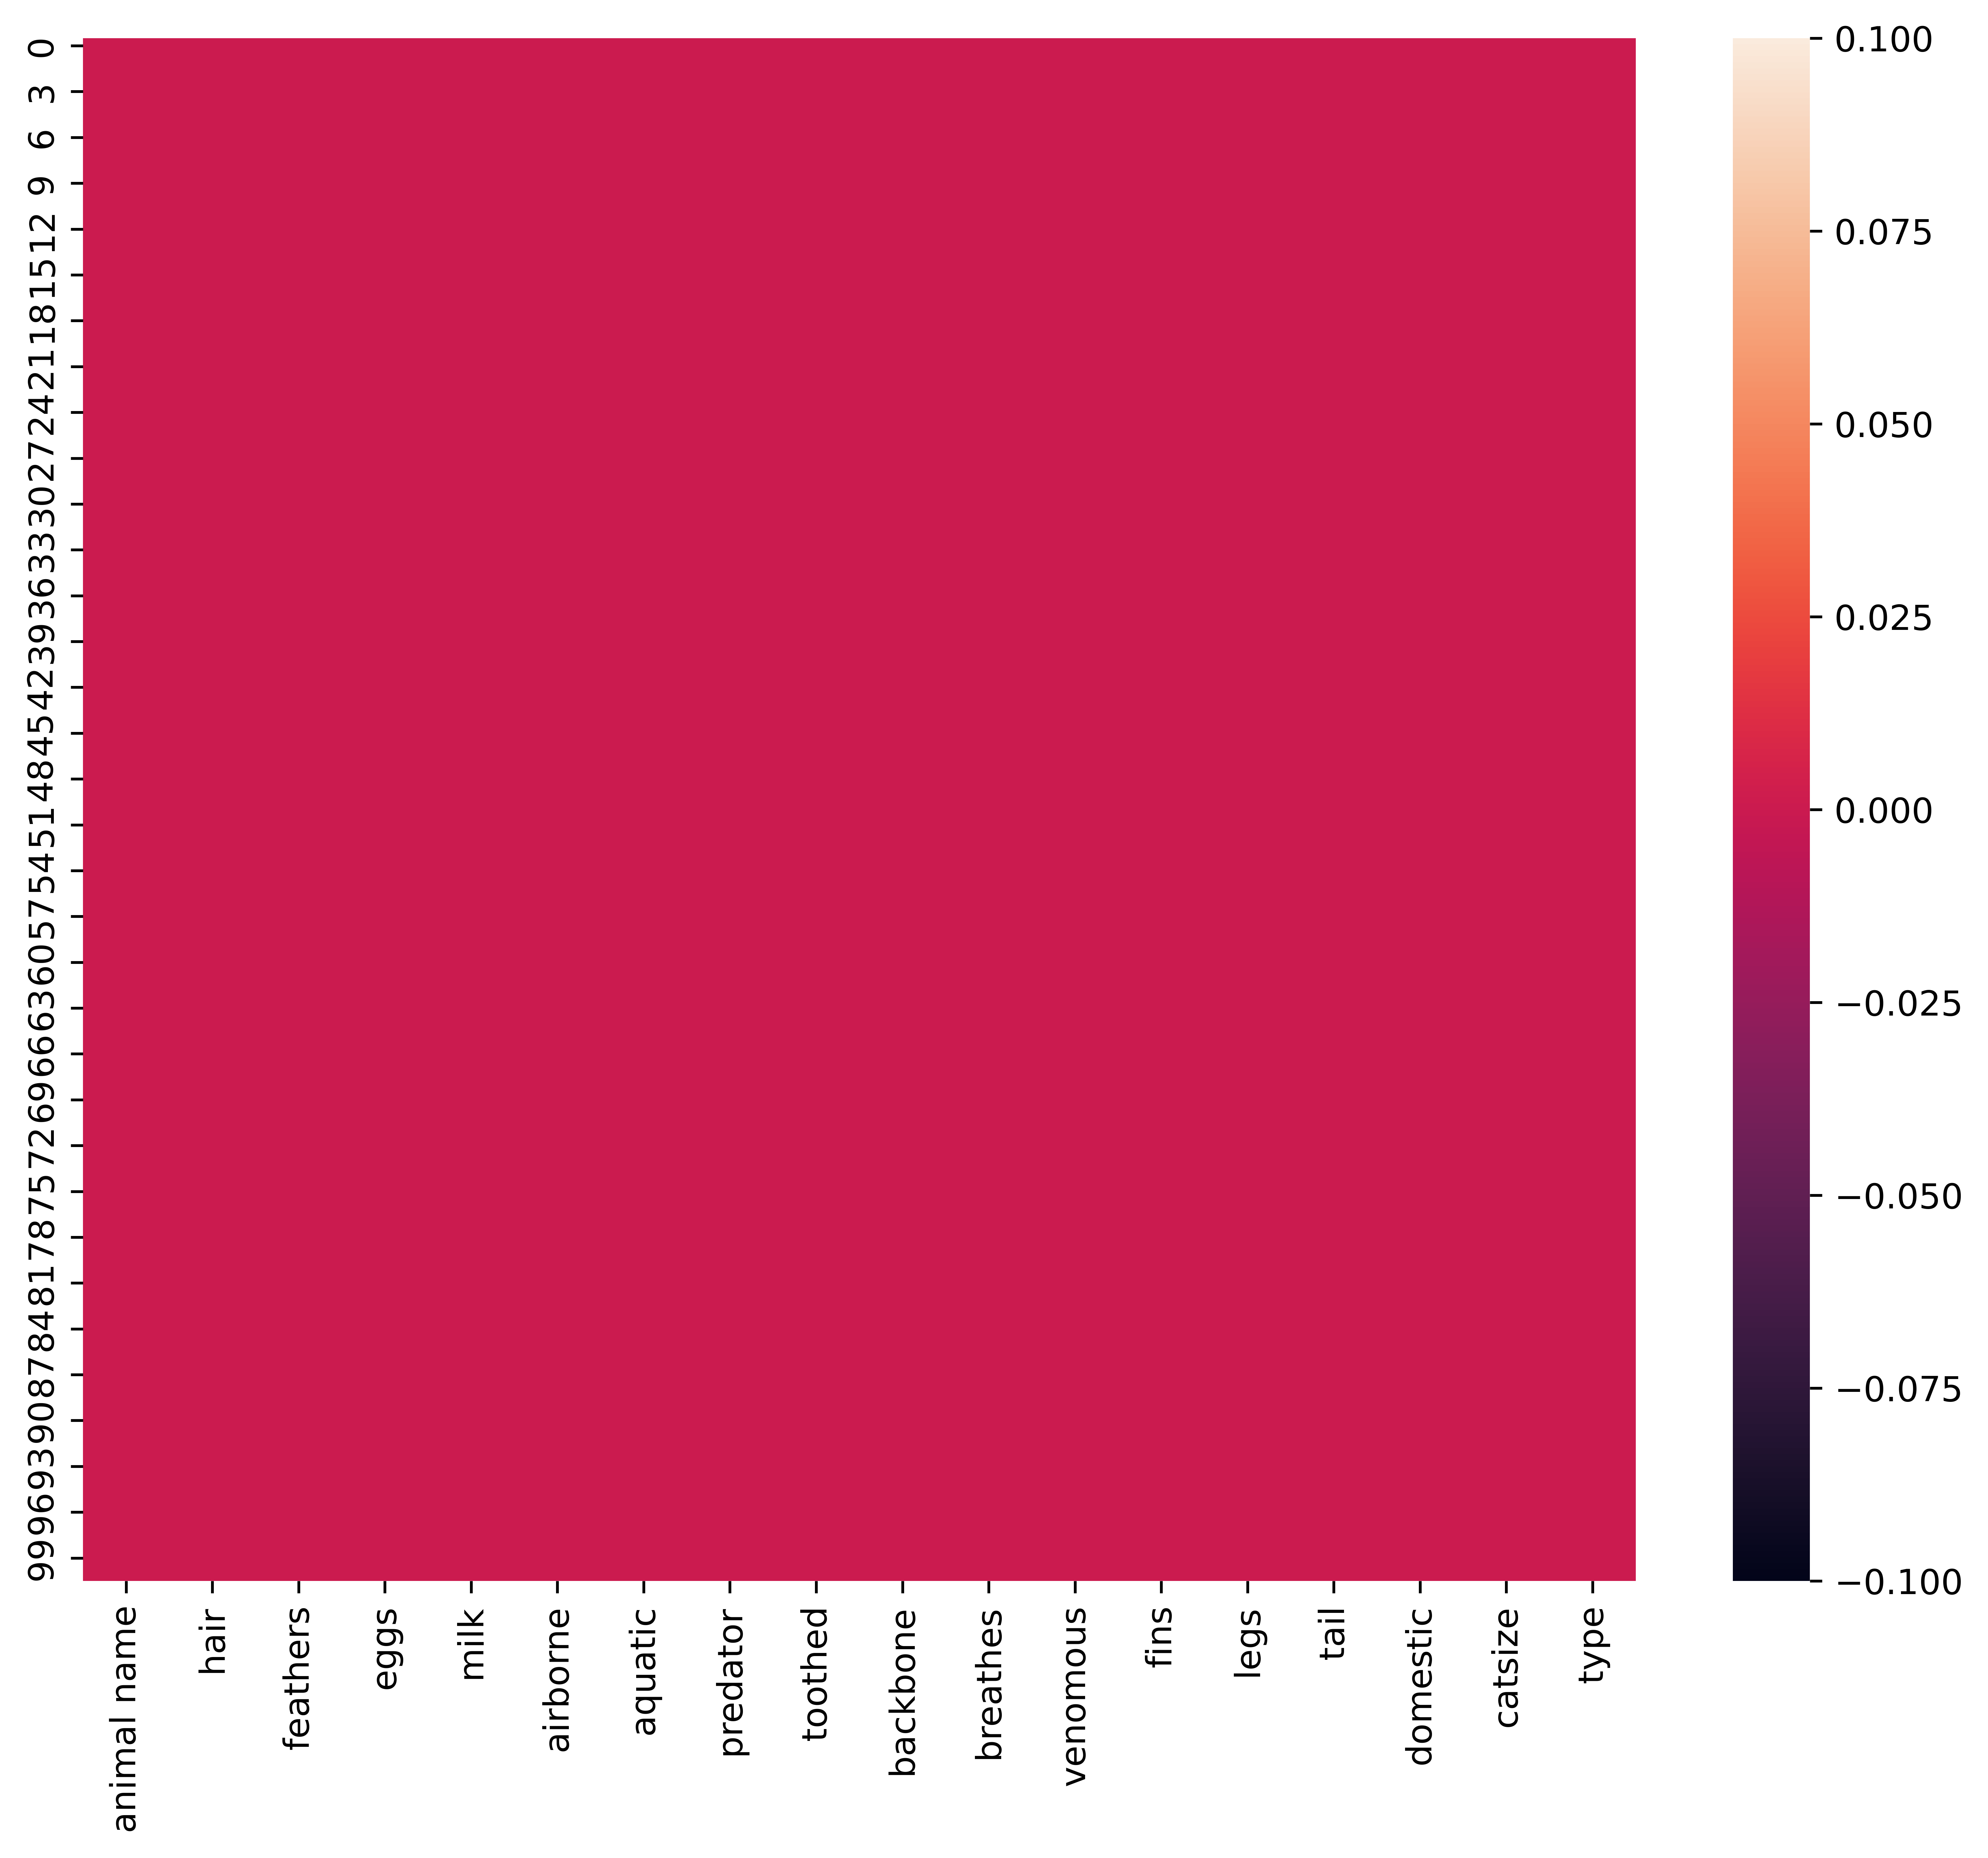

In [12]:
sns.heatmap(df.isna())

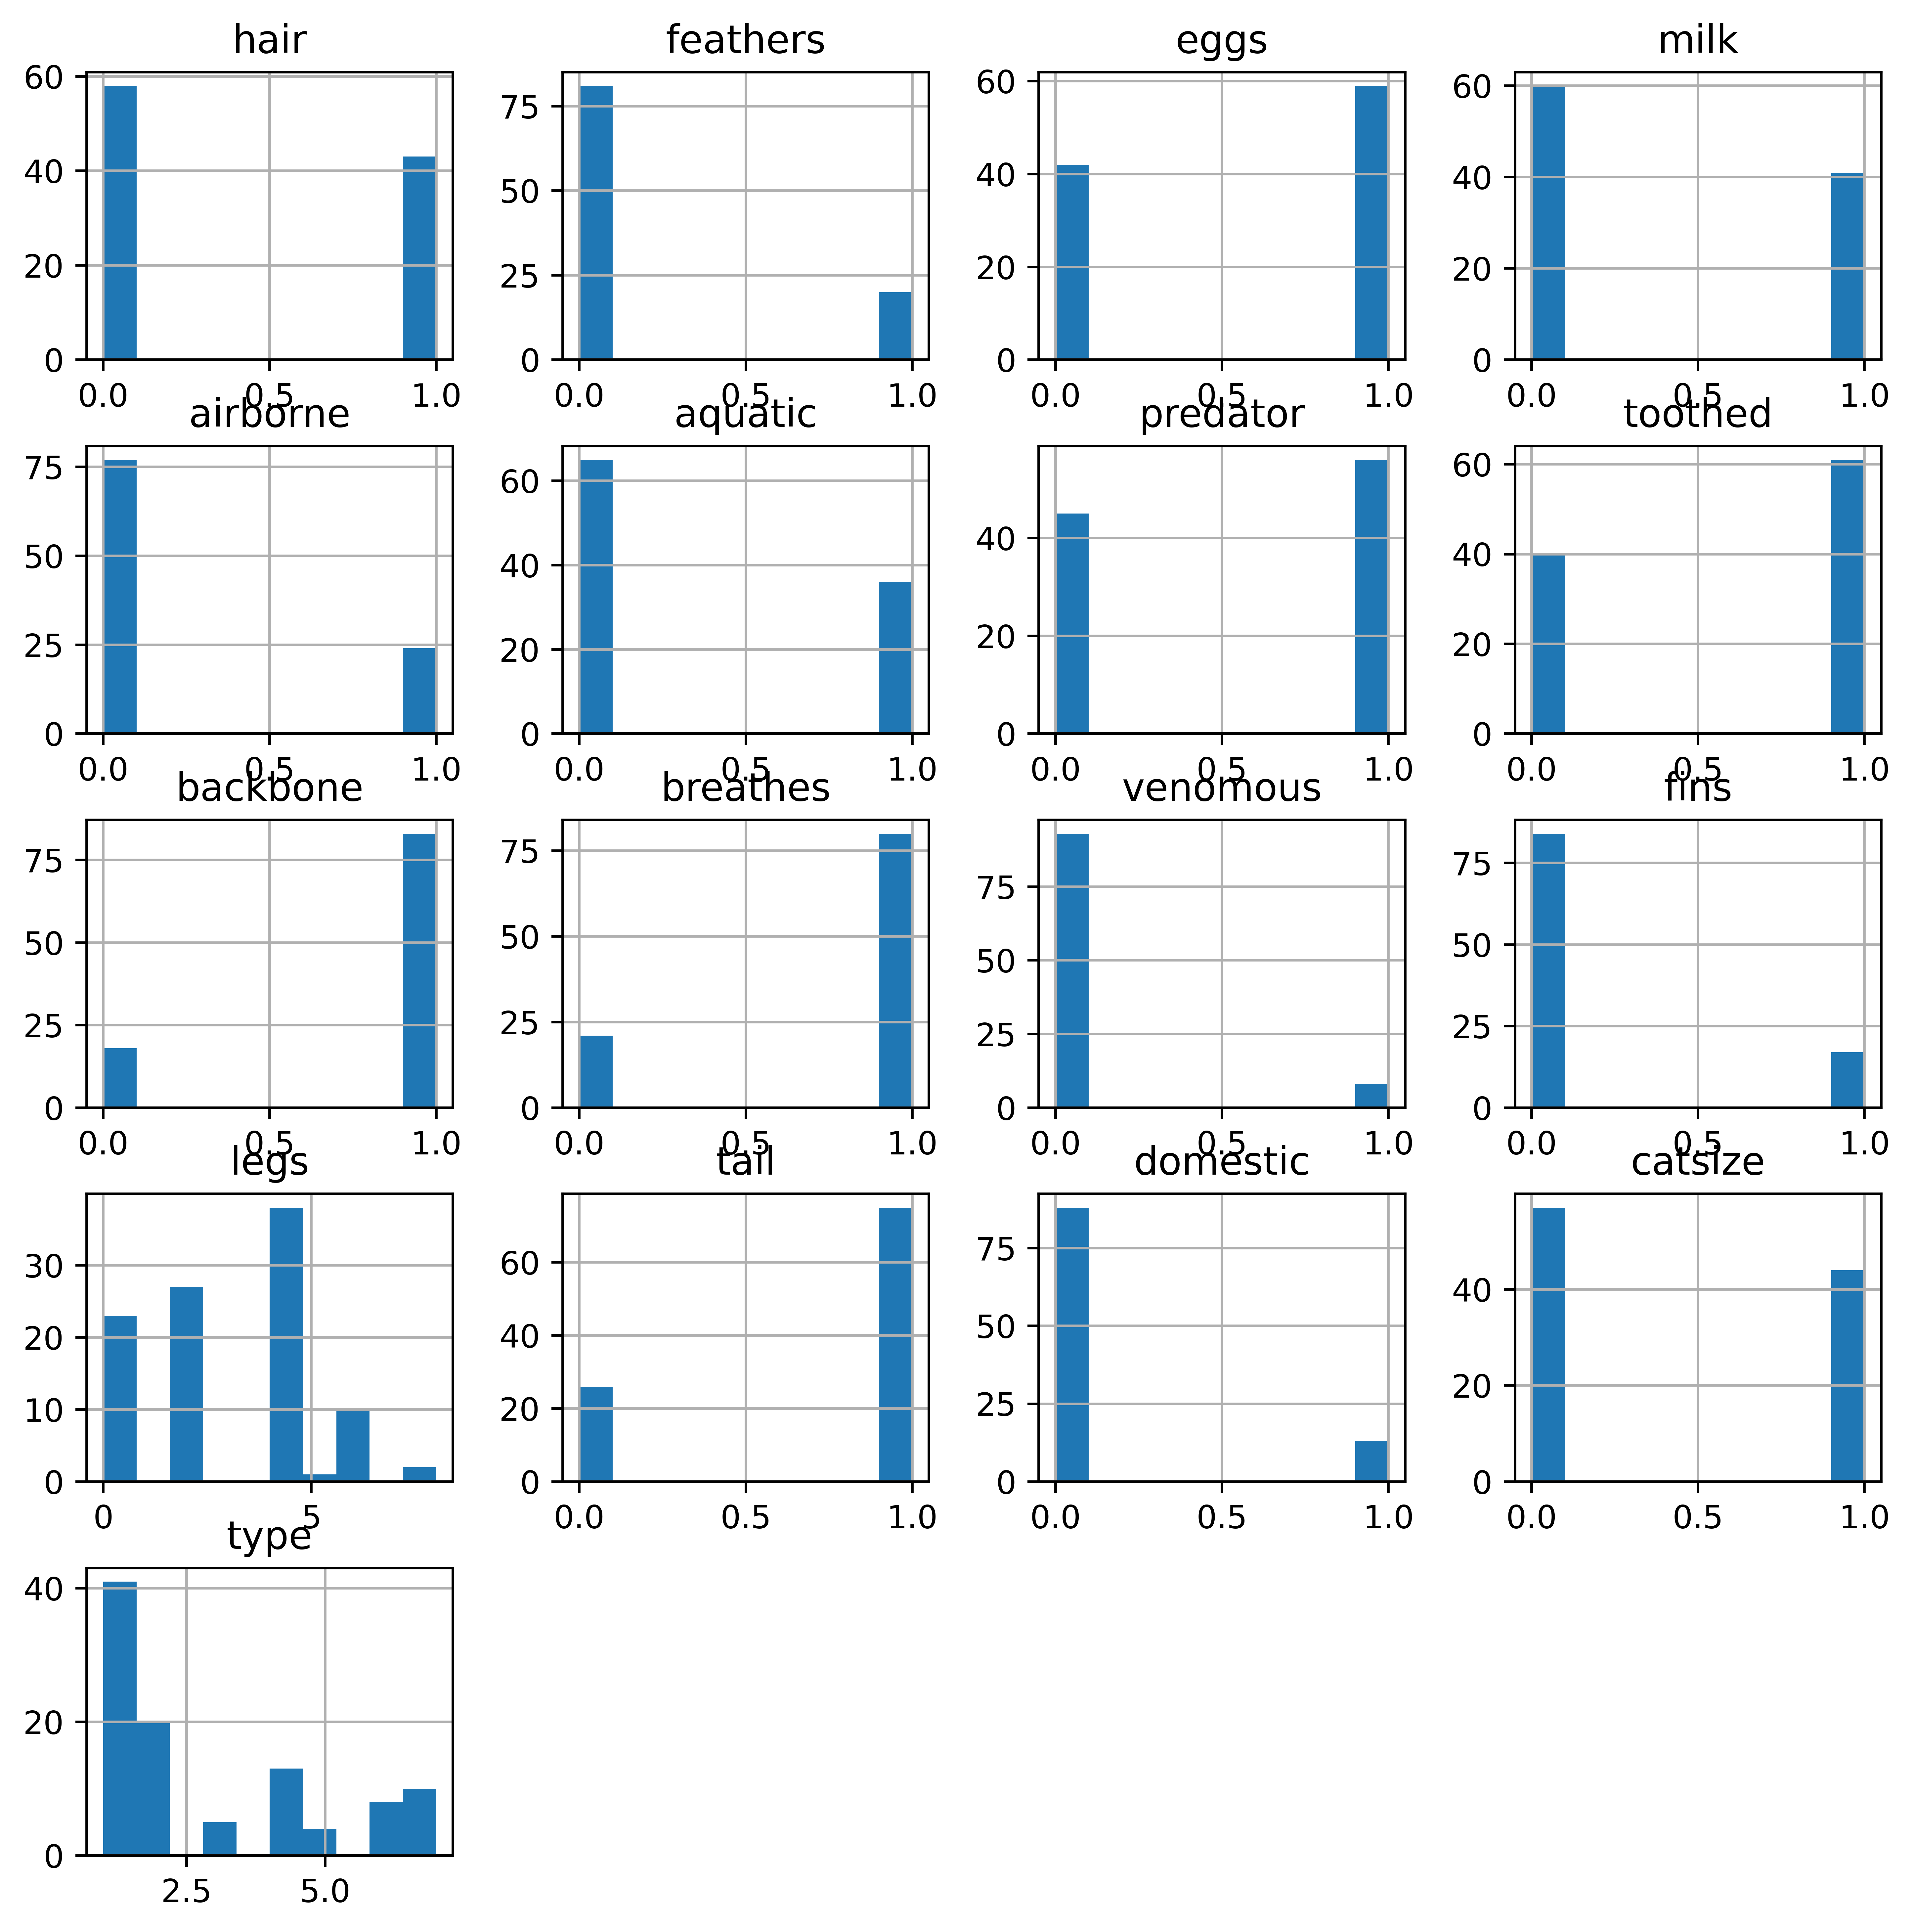

<Figure size 7000x7000 with 0 Axes>

In [21]:
df.hist()
plt.show()
plt.tight_layout()

<Axes: >

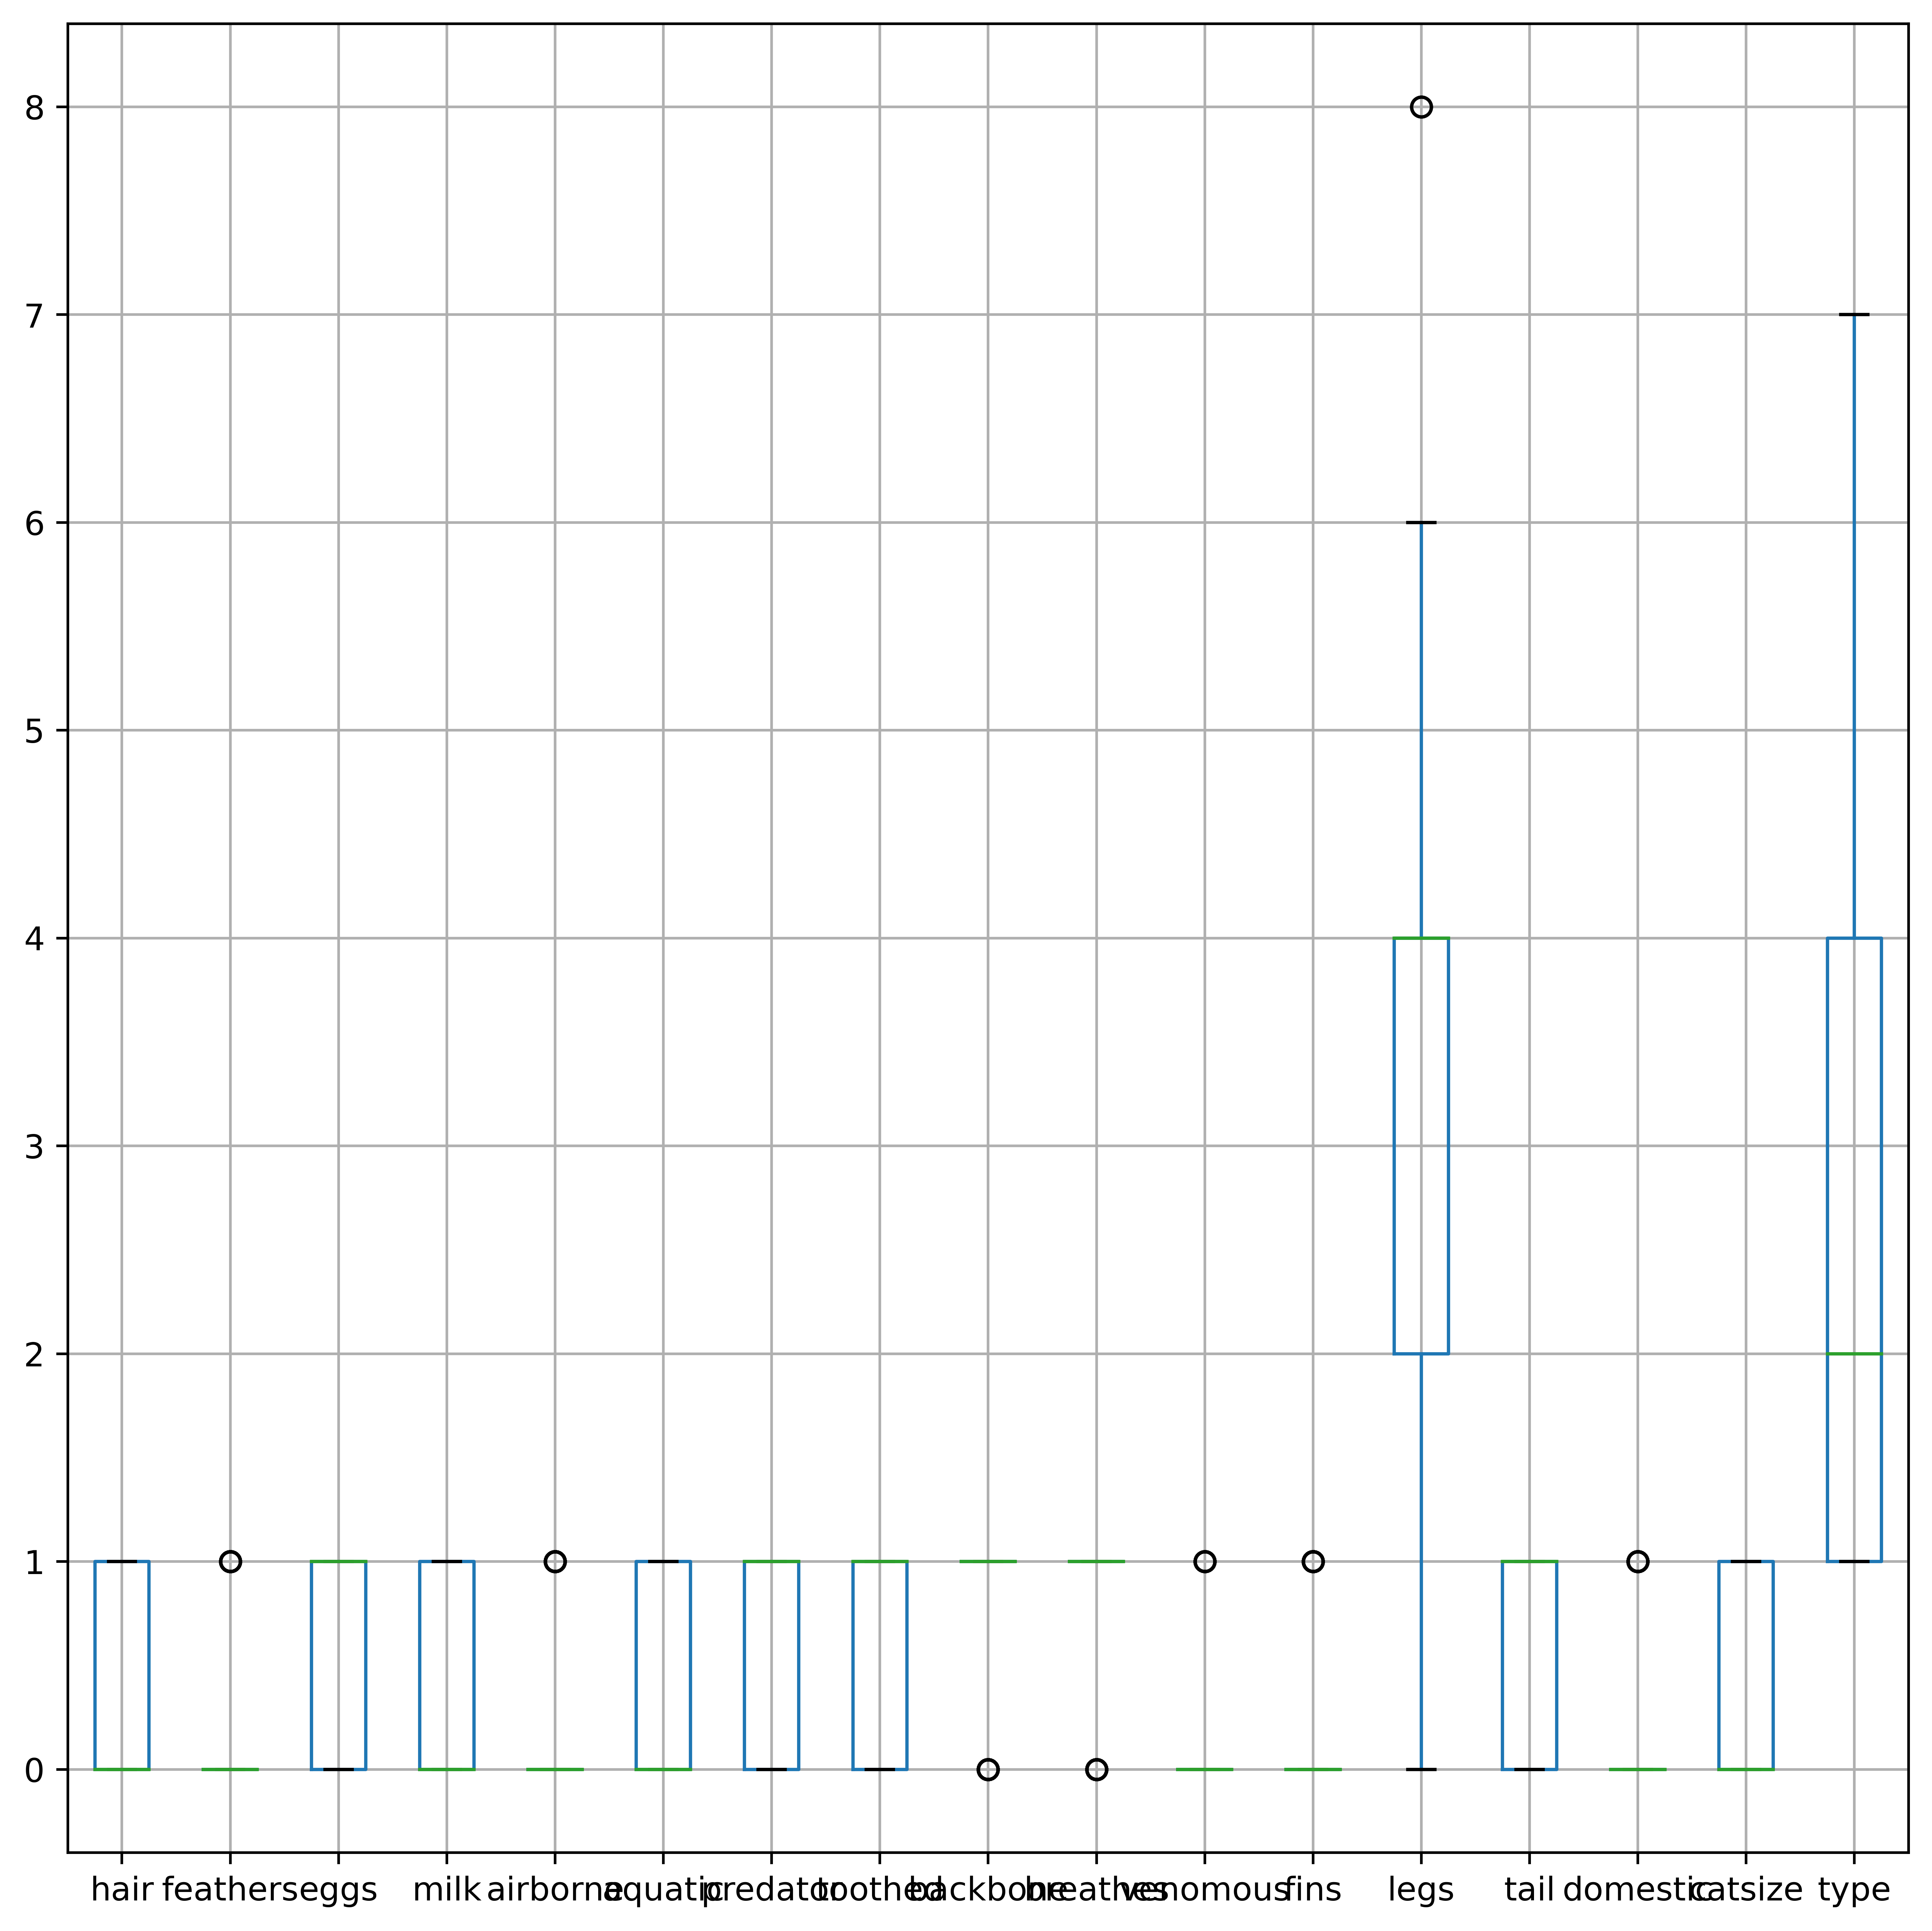

In [22]:
df.boxplot()

In [23]:
df=df.drop(columns=['animal name'])

In [24]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [28]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
32,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1
40,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
39,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0
38,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [31]:
y_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0


In [32]:
x_test

32    1
40    6
39    6
38    4
46    7
     ..
75    1
9     1
72    7
12    4
37    2
Name: type, Length: 80, dtype: int64

In [33]:
y_test

94     1
78     2
17     1
100    2
36     1
85     7
55     1
83     2
82     4
52     5
95     2
44     1
31     1
93     1
65     1
35     1
66     1
70     1
81     7
80     3
33     2
Name: type, dtype: int64

In [34]:
# Hyperparameter Tunning

In [43]:
params=np.array([i*1+2 for i in range(0,41)])
param_grid=dict(n_neighbors=params)

In [44]:
params

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42])

In [45]:
param_grid

{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42])}

In [48]:
knn=KNeighborsClassifier()
grid=GridSearchCV(estimator=knn,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42])})

In [50]:
print(grid.best_score_)
print(grid.best_params_)

0.93
{'n_neighbors': 3}


In [51]:
grid.score(x,y)

0.9801980198019802

In [54]:
grid.predict(x)

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 4, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 5, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [55]:
grid.score(x,y)

0.9801980198019802

In [56]:
# model with hyperparameter tunning

In [57]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [58]:
knn.score(x,y)

0.9801980198019802

In [59]:
ypred=knn.predict(x)

In [60]:
knn.score(x,y)

0.9801980198019802

In [61]:
from sklearn.metrics import classification_report

In [63]:
classification_report(y,ypred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        41\n           2       1.00      1.00      1.00        20\n           3       1.00      0.60      0.75         5\n           4       0.93      1.00      0.96        13\n           5       0.80      1.00      0.89         4\n           6       1.00      1.00      1.00         8\n           7       1.00      1.00      1.00        10\n\n    accuracy                           0.98       101\n   macro avg       0.96      0.94      0.94       101\nweighted avg       0.98      0.98      0.98       101\n'